In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
def adf_test(timeseries):
    print("Result of Dickey-Fuller Test")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["test statistics", "p-value", "lags used", "number of observation"])
    for key, value in dftest[4].items():
        dfoutput["critical value(%s)" % key] = value
    print(dfoutput)
    if dfoutput["p-value"] < 0.05:
        print("signal is stationary")
    else:
        print("signal is non-stationary")

In [3]:
def plot_acf_fig(data, title="acg"):
    fig, axs = plt.subplots()
    plot_acf(data, ax=axs, title=title, zero=False,lags=np.arange(1,350))

In [4]:
def seasonal_plot(data, period, title=""):
    seasonal_decomposed = seasonal_decompose(data, period=period)
    seasonal = seasonal_decomposed.seasonal
    trend = seasonal_decomposed.trend
    resid = seasonal_decomposed.resid

    fig, axs = plt.subplots(3)
    axs[0].plot(seasonal)
    axs[0].set_title("seasonal")
    axs[1].plot(trend)
    axs[1].set_title("trend")
    axs[2].plot(resid)
    axs[2].set_title("residual")
    return np.nan_to_num(trend)

In [5]:
f1 = 5
f2 = 19
sample = 2000
t = np.linspace(0, 1, sample)

In [6]:
y1 = np.sin(2 * np.pi * f1 * t)
y2 = np.sin(2 * np.pi * f2 * t)
y_total = y1 + y2
y_noise = np.random.normal(loc=0, scale=0.5, size=sample)
y_noise_added = y_total + y_noise
y_trend_linear = 2 * t * 2 + 0.1
y_linear_trend_added = y_trend_linear + y_noise_added
y_trend_exponential = np.exp(t)
y_exponential_trend_added = y_trend_exponential+y_noise_added


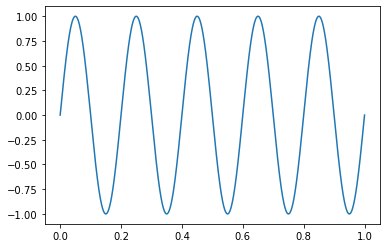

In [7]:
plt.plot(t,y1)
plt.show()

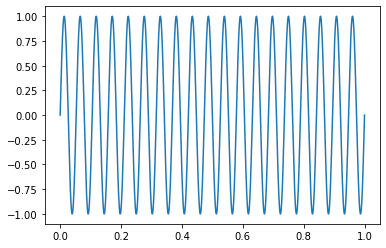

In [8]:
plt.plot(t,y2)

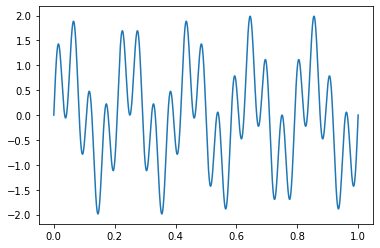

In [9]:
plt.plot(t,y_total)

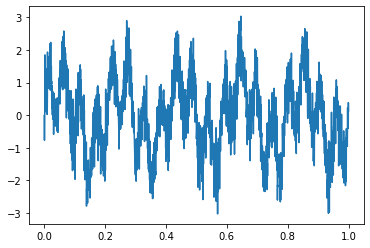

In [10]:
plt.plot(t,y_noise_added)

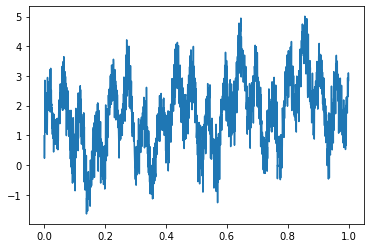

In [11]:
plt.plot(t,y_exponential_trend_added)

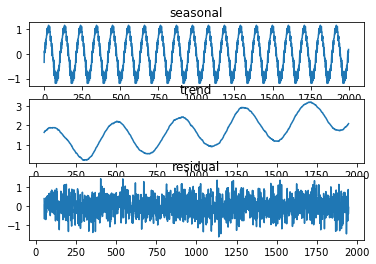

In [12]:
trend_1 = seasonal_plot(y_exponential_trend_added, 105)

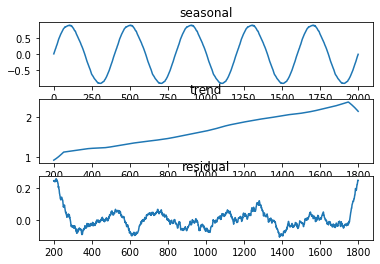

In [13]:
trend_2 = seasonal_plot(trend_1, 400)